# Librerias ---


In [1]:
import pandas as pd

#Permite buscar y recuperar una lista de nombres de archivos que coinciden con un patrón específico de nombre
#de archivo en un directorio o en una jerarquía de directorios.
import glob

import numpy as np
import os
import datetime as dt


import matplotlib.pyplot as plt
import seaborn as sns

# Extracción datos

ruta=r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Datamind\Data Flow\df_datamind_historico.csv'
data=pd.read_csv(ruta,dtype=str)

data_filtrada=data[(data['Country']=='Mexico')
                   &(data['Tipo de dato']=='sem')
                   &(data['Date'].str.startswith('2022'))|(data['Date'].str.startswith('2023'))]
ruta=r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Campañas\Data\Mex_datamind_2022_2023.csv'
data_filtrada.to_csv(ruta,index=False)

In [2]:


#. utilizamos la función glob para crear una lista de rutas de archivo que coinciden con el patrón *Chile Mensual*.csv
#. en el directorio path_chi_men. Esto nos da una lista de todas las rutas de archivo que cumplen con el patrón en el
#. directorio.


#_______________________
#--- AMAZON 
#_______________________


#--- Campañas digitales
paht_data_impresiones= r'C:\Users\SSN0609\OneDrive - Stanley Black & Decker\Dashboards LAG\Data Flow\Campañas\Dataflow\Campañas Digitales SBD.xlsx'
df_impresiones = pd.read_excel(paht_data_impresiones, dtype=str)

#Datamind_historico
paht_mex_datamind22_23= r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Campañas\Data\Mex_datamind_2022_2023.csv'
df_datamind_historico = pd.read_csv(paht_mex_datamind22_23, dtype=str, encoding='UTF-8',sep=",", quotechar='"',decimal='.')

#Datamind_actualizacion
paht_datamind_actualizacion= r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Datamind\Data Flow\datamind_actualizacion_historico.csv'
df_datamind_actualizacion = pd.read_csv(paht_datamind_actualizacion, dtype=str, encoding='UTF-8',sep=",", quotechar='"',decimal='.')

#Meli_Amz_historico

paht_meli_amz_historico= r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Datamind\Data Flow\meli_amz_historico.csv'
df_meli_amz_historico = pd.read_csv(paht_meli_amz_historico, dtype=str, encoding='UTF-8',sep=",", quotechar='"',decimal='.')

paht_meli_amz_actualizacion= r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Datamind\Data Flow\meli_amz_update.csv'
df_meli_amz_actualizacion = pd.read_csv(paht_meli_amz_actualizacion, dtype=str, encoding='UTF-8',sep=",", quotechar='"',decimal='.')

datamind= pd.concat([df_datamind_historico,df_datamind_actualizacion,df_meli_amz_historico,df_meli_amz_actualizacion])

In [3]:
datamind=datamind[(datamind['Country']=='Mexico')|(datamind['Country']=='Brasil')]

In [4]:
datamind['sem_marca']= datamind['Date']+datamind['(I) MARCA']+datamind['Country']
df_impresiones['Fecha inicio']=df_impresiones['Semana'].str[0:10]
df_impresiones['Fecha inicio'] = pd.to_datetime(df_impresiones['Fecha inicio'], format='%Y-%m-%d')


In [5]:
#--- SEM INICIO
from datetime import datetime as dt
from datetime import timedelta as tm
def sem_inicio(row):
    fecha_inicio = row['Fecha inicio']
    year = fecha_inicio.year  
    week = fecha_inicio.isocalendar()[1]
    if len(str(week)) == 1:
      week = '0' + str(week)

    sem_inicio = str(year) + str(week)
    return sem_inicio

df_impresiones['sem_inicio']=df_impresiones.apply(sem_inicio, axis=1)
    

In [6]:
#--- NOMBRE CAMPAÑA
df_impresiones['Nombre de la campaña']=df_impresiones['Nombre de la campaña'].replace(" ","")
df_impresiones['Nombre de la campaña']=df_impresiones['Nombre de la campaña'].str.strip()

def extract_abbreviation(campaign_name):
  return campaign_name[:2].rstrip('%').isalnum() and campaign_name[:2] or 'Other'

df_impresiones['abreviatura'] = df_impresiones['Nombre de la campaña'].apply(extract_abbreviation)

unique_abbreviations = df_impresiones['abreviatura'].unique()
print(unique_abbreviations)

#--- MARCA
df_impresiones['Marca'] = df_impresiones['abreviatura'].apply(lambda x: "DEWALT" if x=="DW" else "BLACK+DECKER" if x == "BD" else "STANLEY" if x == "ST" else "IRWIN")

#--- SEM_MARCA
df_impresiones['Country'].unique()
df_impresiones['Pais'] = df_impresiones['Country'].apply(lambda x: "Mexico" if x =="MX" else "Brasil")
df_impresiones['Pais'].unique()
df_impresiones['sem_marca']=df_impresiones['sem_inicio']+df_impresiones['Marca']+df_impresiones['Pais']


#--- AGRUPACION y CREACION DE  VARIABLES
df_impresiones['Importe gastado']=df_impresiones['Importe gastado'].astype(float)
df_impresiones['Impresiones']=df_impresiones['Impresiones'].astype(float)


df_impresiones['impresiones max']= df_impresiones.groupby('sem_marca')['Impresiones'].transform('max').reset_index(drop=True)
df_impresiones['impresiones min']= df_impresiones.groupby('sem_marca')['Impresiones'].transform('min').reset_index(drop=True)
df_impresiones['impresiones avg']= df_impresiones.groupby('sem_marca')['Impresiones'].transform('mean').reset_index(drop=True)
df_impresiones['impresiones std']= df_impresiones.groupby('sem_marca')['Impresiones'].transform('std').reset_index(drop=True)


df_impresiones['importe max']= df_impresiones.groupby('sem_marca')['Importe gastado'].transform('max').reset_index(drop=True)
df_impresiones['importe min']= df_impresiones.groupby('sem_marca')['Importe gastado'].transform('min').reset_index(drop=True)
df_impresiones['importe avg']= df_impresiones.groupby('sem_marca')['Importe gastado'].transform('mean').reset_index(drop=True)
df_impresiones['importe std']= df_impresiones.groupby('sem_marca')['Importe gastado'].transform('std').reset_index(drop=True)


df_impresiones['CPM'] =(df_impresiones['Importe gastado']/df_impresiones['Impresiones'])*1000
df_impresiones['CPM avg'] =df_impresiones.groupby('sem_marca')['CPM'].transform('mean').reset_index(drop=True)
df_impresiones['CPM std'] =df_impresiones.groupby('sem_marca')['CPM'].transform('std').reset_index(drop=True)

df_impresiones['num_campaign'] = df_impresiones.groupby('sem_marca')['Nombre de la campaña'].transform('size')
#df_impresiones['campaign avg'] = df_impresiones.groupby('sem_marca')['num_campaign'].transform('mean').reset_index(drop=True)


df_impresiones['Year']=df_impresiones['sem_inicio'].str[:4]
df_impresiones['Month']=df_impresiones['Fecha inicio'].dt.month


# Normalización de las variables
df_impresiones['Impresiones_norm'] = (df_impresiones['Impresiones'] - df_impresiones['impresiones avg']) / df_impresiones['impresiones std']
df_impresiones['Importe_gastado_norm'] = (df_impresiones['Importe gastado'] - df_impresiones['importe avg']) / df_impresiones['importe std']
df_impresiones['CPM_norm'] = (df_impresiones['CPM'] - df_impresiones['CPM avg']) / df_impresiones['CPM std']

df_impresiones['impresiones_avg_norm']= df_impresiones.groupby('sem_marca')['Impresiones_norm'].transform('mean').reset_index(drop=True)
df_impresiones['importe_avg_norm']= df_impresiones.groupby('sem_marca')['Importe_gastado_norm'].transform('mean').reset_index(drop=True)
df_impresiones['CPM_avg_norm'] =df_impresiones.groupby('sem_marca')['CPM_norm'].transform('mean').reset_index(drop=True)

df_impresiones['impresiones_std_norm']= df_impresiones.groupby('sem_marca')['Impresiones_norm'].transform('std').reset_index(drop=True)
df_impresiones['importe_std_norm']= df_impresiones.groupby('sem_marca')['Importe_gastado_norm'].transform('std').reset_index(drop=True)
df_impresiones['CPM_std_norm'] =df_impresiones.groupby('sem_marca')['CPM_norm'].transform('std').reset_index(drop=True)

['BD' 'DW' 'ST' 'IW']


In [7]:
#--- VENTA AGRUPADA
datamind['Venta_neta_usd']=datamind['Venta_neta_usd'].astype(float)
venta_agrupada = datamind.groupby('sem_marca')['Venta_neta_usd'].sum().to_frame(name='venta_agrupada').reset_index()
venta_agrupada['venta max']= datamind.groupby('sem_marca')['Venta_neta_usd'].transform('max').reset_index(drop=True)
venta_agrupada['venta min']= datamind.groupby('sem_marca')['Venta_neta_usd'].transform('min').reset_index(drop=True)
venta_agrupada['venta avg']= datamind.groupby('sem_marca')['Venta_neta_usd'].transform('mean').reset_index(drop=True)
venta_agrupada['venta std']= datamind.groupby('sem_marca')['Venta_neta_usd'].transform('std').reset_index(drop=True)


venta_agrupada['venta_norm']= (venta_agrupada['venta_agrupada']-venta_agrupada['venta avg'])/venta_agrupada['venta std']
venta_agrupada['venta_norm avg']= venta_agrupada.groupby('sem_marca')['venta_norm'].transform('mean').reset_index(drop=True)
venta_agrupada['venta_norm std']= venta_agrupada.groupby('sem_marca')['venta_norm'].transform('std').reset_index(drop=True)






In [8]:
df_impresiones = pd.merge(df_impresiones, venta_agrupada[['sem_marca', 'venta_agrupada','venta max','venta min','venta avg','venta_norm','venta_norm avg','venta_norm std']], on=["sem_marca"], how='left')

df_impresiones['ROI aprox'] = (df_impresiones['venta_agrupada'] - df_impresiones['Importe gastado']) / df_impresiones['Importe gastado']
df_impresiones['ROI avg'] = df_impresiones.groupby('sem_marca')['ROI aprox'].transform('mean').reset_index(drop=True)
df_impresiones['ROI std'] = df_impresiones.groupby('sem_marca')['ROI aprox'].transform('std').reset_index(drop=True)


df_impresiones['ROI_norm']= (df_impresiones['ROI aprox']-df_impresiones['ROI avg'])/df_impresiones['ROI std']
df_impresiones['ROI_norm avg']= df_impresiones.groupby('sem_marca')['ROI_norm'].transform('mean').reset_index(drop=True)
df_impresiones['ROI_norm std']= df_impresiones.groupby('sem_marca')['ROI_norm'].transform('std').reset_index(drop=True)



In [9]:
df_impresiones.columns

Index(['Country', 'Semana', 'Nombre de la campaña', 'Campaign Consolidated',
       'Impresiones', 'Importe gastado', 'Fecha inicio', 'sem_inicio',
       'abreviatura', 'Marca', 'Pais', 'sem_marca', 'impresiones max',
       'impresiones min', 'impresiones avg', 'impresiones std', 'importe max',
       'importe min', 'importe avg', 'importe std', 'CPM', 'CPM avg',
       'CPM std', 'num_campaign', 'Year', 'Month', 'Impresiones_norm',
       'Importe_gastado_norm', 'CPM_norm', 'impresiones_avg_norm',
       'importe_avg_norm', 'CPM_avg_norm', 'impresiones_std_norm',
       'importe_std_norm', 'CPM_std_norm', 'venta_agrupada', 'venta max',
       'venta min', 'venta avg', 'venta_norm', 'venta_norm avg',
       'venta_norm std', 'ROI aprox', 'ROI avg', 'ROI std', 'ROI_norm',
       'ROI_norm avg', 'ROI_norm std'],
      dtype='object')

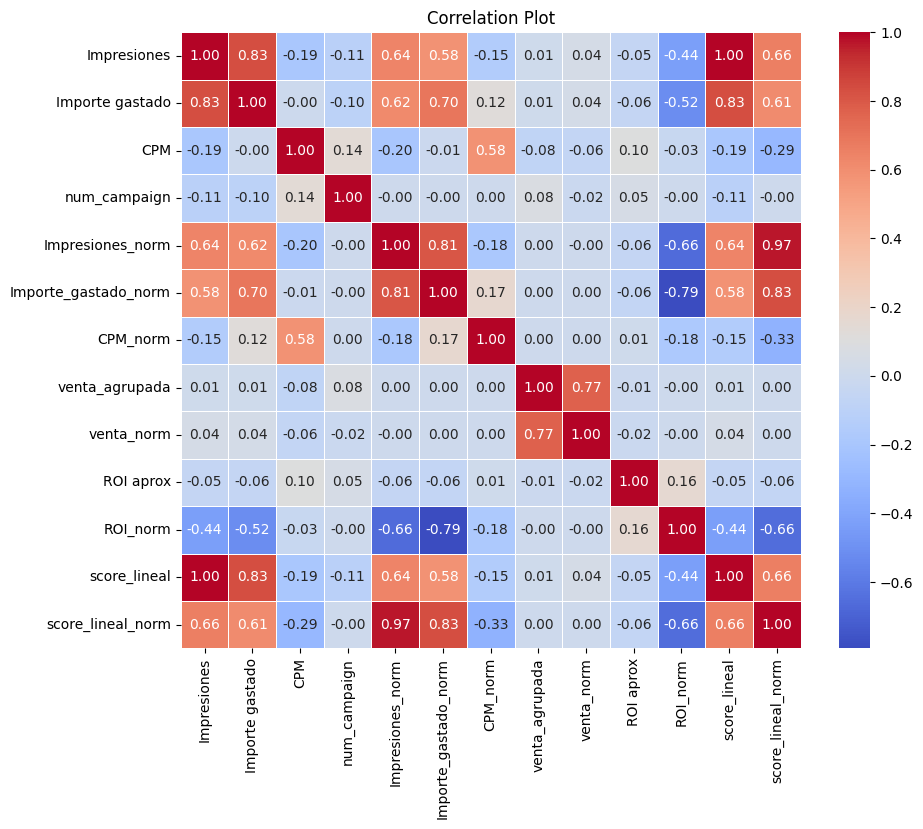

In [10]:
#--- SCORE LINEAL
peso_impresiones = 0.4
peso_importe_gastado = 0.37
peso_CPM = 0.23
peso_ROI_aprox = 0.0

df_impresiones['score_lineal'] = (df_impresiones['Impresiones'] * peso_impresiones +
                                     df_impresiones['Importe gastado'] * peso_importe_gastado +
                                     df_impresiones['CPM'] * peso_CPM +
                                     df_impresiones['ROI aprox'] * peso_ROI_aprox)

#--- SCORE LINEAL NORMALIZADO
peso_impresiones = 0.44
peso_importe_gastado = 0.33
peso_CPM = 0.23
peso_ROI_aprox = 0.0

df_impresiones['score_lineal_norm'] = (df_impresiones['Impresiones_norm'] * peso_impresiones +
                                     df_impresiones['Importe_gastado_norm'] * peso_importe_gastado +
                                     (1-df_impresiones['CPM_norm']) * peso_CPM +
                                     df_impresiones['ROI_norm'] * peso_ROI_aprox)

col=[
       'Impresiones', 'Importe gastado', 'CPM', 'num_campaign', 
       'Impresiones_norm', 'Importe_gastado_norm', 'CPM_norm',
       'venta_agrupada', 'venta_norm',
       'ROI aprox', 
       'ROI_norm','score_lineal','score_lineal_norm' ]

correction_corr=df_impresiones[col]
correction_corr = correction_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correction_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


#--- SCORE SIGMOIDE

def calculate_campaign_score(impresiones, importe, cpm, roi, avg_impresiones, avg_importe, avg_cpm, avg_roi, alpha, beta, gamma,sigma):
    # Función sigmoidea para transformar las variables y penalizar los valores extremos
    sigmoid = lambda x, avg_x: 1 / (1 + np.exp(-x * (avg_x - x)))
    
    # Transformación de las variables con respecto a los promedios
    impressions_score = sigmoid(alpha, impresiones - avg_impresiones)
    spent_amount_score = sigmoid(beta, importe - avg_importe)
    cpm_score = sigmoid(gamma, cpm - avg_cpm)
    sales_score = sigmoid(sigma, roi - avg_roi)
    # Cálculo del puntaje final combinando las puntuaciones de las variables
    campaign_score = impressions_score * spent_amount_score * cpm_score *sales_score
    return campaign_score

alpha = 0.4
beta = 0.3
gamma = 0.2
sigma=0.1

df_impresiones['score_sigmoide'] = df_impresiones.apply(lambda row: calculate_campaign_score(row['Impresiones'], row['Importe gastado'], row['CPM'], row['ROI aprox'], row['impresiones avg'],row['importe avg'], row['CPM avg'], row['ROI avg'], alpha, beta, gamma,sigma), axis=1)
df_impresiones['score_sigmoide'] = df_impresiones.apply(lambda row: calculate_campaign_score(row['Impresiones_norm'], row['Importe_gastado_norm'], row['CPM_norm'],row['ROI_norm'], row['impresiones_avg_norm'],row['importe_avg_norm'], row['CPM_avg_norm'],row['ROI_norm avg'], alpha, beta, gamma,sigma), axis=1)

col=[
       'Impresiones', 'Importe gastado', 'CPM', 'ROI aprox', 
       'impresiones avg','importe avg','CPM avg','ROI avg',
      'Impresiones_norm','Importe_gastado_norm', 'CPM_norm','ROI_norm',
    'impresiones_avg_norm','importe_avg_norm', 'CPM_avg_norm','ROI_norm avg','score_sigmoide','score_sigmoide_norm']


correction_corr=df_impresiones[col]
correction_corr = correction_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correction_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()



In [11]:
df_impresiones.columns

Index(['Country', 'Semana', 'Nombre de la campaña', 'Campaign Consolidated',
       'Impresiones', 'Importe gastado', 'Fecha inicio', 'sem_inicio',
       'abreviatura', 'Marca', 'Pais', 'sem_marca', 'impresiones max',
       'impresiones min', 'impresiones avg', 'impresiones std', 'importe max',
       'importe min', 'importe avg', 'importe std', 'CPM', 'CPM avg',
       'CPM std', 'num_campaign', 'Year', 'Month', 'Impresiones_norm',
       'Importe_gastado_norm', 'CPM_norm', 'impresiones_avg_norm',
       'importe_avg_norm', 'CPM_avg_norm', 'impresiones_std_norm',
       'importe_std_norm', 'CPM_std_norm', 'venta_agrupada', 'venta max',
       'venta min', 'venta avg', 'venta_norm', 'venta_norm avg',
       'venta_norm std', 'ROI aprox', 'ROI avg', 'ROI std', 'ROI_norm',
       'ROI_norm avg', 'ROI_norm std', 'score_lineal', 'score_lineal_norm'],
      dtype='object')

# TOP SEMANAL

In [12]:

#--- BY SEM_MARCA

# Ordenar el DataFrame por las columnas relevantes
df_impresiones_sem_sorted = df_impresiones.sort_values(by=['Year', 'Marca', 'Pais', 'score_lineal_norm'], ascending=[True, True, True, False])

# Agrupar por año, marca y país, y luego obtener los mejores 12 registros para cada grupo
top_12_sem_marca = df_impresiones_sem_sorted.groupby(['Year', 'Marca', 'Pais']).head(12)
top_12_sem_marca.loc[:, 'tipo'] = 'top12_sem_marca'
top_12_sem_marca['campaign avg']= top_12_sem_marca.groupby(['Year', 'Marca', 'Pais'])['num_campaign'].transform('mean')


C:\Users\SSN0609\AppData\Local\Temp\ipykernel_7660\3685500034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_12_sem_marca.loc[:, 'tipo'] = 'top12_sem_marca'
C:\Users\SSN0609\AppData\Local\Temp\ipykernel_7660\3685500034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_12_sem_marca['campaign avg']= top_12_sem_marca.groupby(['Year', 'Marca', 'Pais'])['num_campaign'].transform('mean')


In [13]:

#--- BY CAMPAIGN CONSOLIDATED

# Ordenar el DataFrame por las columnas relevantes
top_12_tipo_camp = df_impresiones.sort_values(by=['Year', 'Marca','Campaign Consolidated', 'Pais', 'score_lineal_norm'], ascending=[True,True, True, True, False])

# Agrupar por año, marca y país, y luego obtener los mejores 12 registros para cada grupo
top_12_tipo_camp = top_12_tipo_camp.groupby(['Year', 'Marca', 'Campaign Consolidated','Pais']).head(12)
top_12_tipo_camp.loc[:, 'tipo'] = 'top12_tipo_camp'
top_12_tipo_camp['campaign avg']= top_12_tipo_camp.groupby(['Year', 'Marca','Campaign Consolidated', 'Pais'])['num_campaign'].transform('mean')


# TOP MENSUAL

In [14]:
# Ordenar el DataFrame por las columnas relevantes
df_impresiones_men_sorted = df_impresiones.sort_values(by=['Year', 'Month', 'Marca', 'Pais', 'score_lineal_norm'], ascending=[True, True, True, True, False])

# Convertir Year y Month a cadenas de texto
df_impresiones_men_sorted['Year'] = df_impresiones_men_sorted['Year'].astype(str)
df_impresiones_men_sorted['Month'] = df_impresiones_men_sorted['Month'].astype(str)

# Crear la columna 'mes_marca' para identificar los meses y marcas
df_impresiones_men_sorted['mes_marca'] = df_impresiones_men_sorted['Year'] + df_impresiones_men_sorted['Month'] + df_impresiones_men_sorted['Marca'] + df_impresiones_men_sorted['Pais']
df_impresiones_men_sorted['campaign avg']= df_impresiones_men_sorted.groupby(['Year','Month', 'Marca', 'Pais'])['num_campaign'].transform('mean').reset_index(drop=True)



df_impresiones_men_sorted['repeticiones']=df_impresiones_men_sorted.groupby('mes_marca').cumcount()
conteo_acomulativo=df_impresiones_men_sorted.groupby('mes_marca')['repeticiones'].max()+1

df_impresiones_men_sorted['conteo']=df_impresiones_men_sorted['mes_marca'].map(conteo_acomulativo)

top_12_men = df_impresiones_men_sorted[df_impresiones_men_sorted['repeticiones']==0]
top_12_men['tipo']='top_men'



C:\Users\SSN0609\AppData\Local\Temp\ipykernel_7660\1319110153.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_12_men['tipo']='top_men'


In [15]:
df_impresiones_men_tipo = df_impresiones.sort_values(by=['Year', 'Month','Campaign Consolidated', 'Marca', 'Pais', 'score_lineal_norm'], ascending=[True,True, True, True, True, False])

# Convertir Year y Month a cadenas de texto
df_impresiones_men_tipo['Year'] = df_impresiones_men_tipo['Year'].astype(str)
df_impresiones_men_tipo['Month'] = df_impresiones_men_tipo['Month'].astype(str)

# Crear la columna 'mes_marca' para identificar los meses y marcas
df_impresiones_men_tipo['mes_tipo'] = df_impresiones_men_tipo['Year'] + df_impresiones_men_tipo['Month'] + df_impresiones_men_tipo['Campaign Consolidated']+df_impresiones_men_tipo['Marca']+df_impresiones_men_tipo['Pais']
df_impresiones_men_tipo['campaign avg']= df_impresiones_men_tipo.groupby(['Year','Month','Campaign Consolidated', 'Marca', 'Pais'])['num_campaign'].transform('mean').reset_index(drop=True)



df_impresiones_men_tipo['repeticiones']=df_impresiones_men_tipo.groupby('mes_tipo').cumcount()
conteo_acomulativo=df_impresiones_men_tipo.groupby('mes_tipo')['repeticiones'].max()+1

df_impresiones_men_tipo['conteo']=df_impresiones_men_tipo['mes_tipo'].map(conteo_acomulativo)

top_12_men_tipo_camp = df_impresiones_men_tipo[df_impresiones_men_tipo['repeticiones']==0]
top_12_men_tipo_camp['tipo']='top_men_tipo'



C:\Users\SSN0609\AppData\Local\Temp\ipykernel_7660\326800366.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_12_men_tipo_camp['tipo']='top_men_tipo'


In [16]:
col=['Country', 'Year','Month','Semana', 'Nombre de la campaña', 'Campaign Consolidated',
       'Impresiones','impresiones max', 'impresiones min', 'impresiones avg', 
       'Importe gastado', 'importe max','importe min', 'importe avg',
       'Fecha inicio', 'sem_inicio',
       'abreviatura', 'Marca', 'Pais',  'num_campaign', 'campaign avg',
       'venta_agrupada', 'venta max', 'venta min', 'venta avg', 'tipo','score_lineal_norm']

top_12_sem_marca=top_12_sem_marca[col]
top_12_tipo_camp=top_12_tipo_camp[col]
top_12_men_tipo_camp=top_12_men_tipo_camp[col]
top_12_men=top_12_men[col]

#lista=[top_12_sem_marca,top_12_tipo_camp,top_12_men,top_12_men_tipo_camp]
lista=[top_12_sem_marca,top_12_men]

top=pd.concat(lista,axis=0,ignore_index=True)

In [17]:
top['Marca'].unique()

array(['BLACK+DECKER', 'DEWALT', 'IRWIN', 'STANLEY'], dtype=object)

In [18]:
# Guardar el df_historico como archivo CSV en la ruta deseada
#ruta_archivo_csv = r'C:\Users\SSN0609\Documents\venta_agrupada.csv'
#venta_agrupada.to_csv(ruta_archivo_csv, index=False)
ruta_local_top = r'C:\Users\SSN0609\Documents\Dashboards LAG PC LOCAL\Data Flow\Campañas\Dataflow\top.csv'
top.to_csv(ruta_local_top, index=False)


#Drive
ruta_drive_top=r'C:\Users\SSN0609\OneDrive - Stanley Black & Decker\Dashboards LAG\Data Flow\Campañas\Dataflow\top.csv'
top.to_csv(ruta_drive_top)


In [19]:
top.columns

Index(['Country', 'Year', 'Month', 'Semana', 'Nombre de la campaña',
       'Campaign Consolidated', 'Impresiones', 'impresiones max',
       'impresiones min', 'impresiones avg', 'Importe gastado', 'importe max',
       'importe min', 'importe avg', 'Fecha inicio', 'sem_inicio',
       'abreviatura', 'Marca', 'Pais', 'num_campaign', 'campaign avg',
       'venta_agrupada', 'venta max', 'venta min', 'venta avg', 'tipo',
       'score_lineal_norm'],
      dtype='object')